# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [47]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [48]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [49]:
#  1. Get the total rides for each city type
city_ride_count_df=pyber_data_df.groupby(["type"]).count()["ride_id"]



In [50]:
# 2. Get the total drivers for each city type
city_driver_count_df=city_data_df.groupby(["type"]).sum()["driver_count"]
city_driver_count_df

#per_school_counts = school_data_complete_df["type"].value_counts()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [51]:
#  3. Get the total amount of fares for each city type
city_fares_df=pyber_data_df.groupby(["type"]).sum()["fare"]
city_fares_df

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [52]:
#  4. Get the average fare per ride for each city type. 
city_mean_fares_df=pyber_data_df.groupby(["type"]).mean()["fare"]
city_mean_fares_df


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [53]:
# 5. Get the average fare per driver for each city type. 
city_mean_fare_per_driver=city_fares_df/city_driver_count_df
city_mean_fares_df
# Calculate the per capita spending.
#per_school_capita = per_school_budget / per_school_counts

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [54]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame({
    "Total Rides":city_ride_count_df,
    "Total Drivers":city_driver_count_df,
    "Total Fares":city_fares_df,
    "Average Fare per Ride":city_mean_fares_df,
    "Average Fare per Driver":city_mean_fares_df
    
})
pyber_summary_df



,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,34.623440
Suburban,625,490,19356.33,30.970128,30.970128
Urban,1625,2405,39854.38,24.525772,24.525772


In [55]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None


In [56]:
#  8. Format the columns.

   # "Total Drivers":city_driver_count_df,
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)   
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)    
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"]  =pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"]=pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)



pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$34.62
Suburban,625,490,"$19,356.33",$30.97,$30.97
Urban,"1,625","2,405","$39,854.38",$24.53,$24.53


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [57]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [58]:
# 1. Read the merged DataFrame

pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [59]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_by_type_date_df=pyber_data_df.groupby(["date","type"]).sum("fare")
fare_by_type_date_df

,,fare,ride_id,driver_count
date,type,,,
2019-01-01 00:08:16,Urban,37.91,5673666505216,69
2019-01-01 00:46:46,Suburban,47.74,2215912677020,23
2019-01-01 02:07:24,Suburban,24.07,7827431948090,10
2019-01-01 03:46:50,Urban,7.57,5815378003370,64
2019-01-01 05:23:21,Urban,10.75,6571513080673,28
...,...,...,...,...
2019-05-08 04:20:00,Urban,21.99,117997692054,52
2019-05-08 04:39:49,Urban,18.45,1811574736337,11
2019-05-08 07:29:01,Urban,18.55,5682021476085,33


In [60]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fare_by_type_date_df= fare_by_type_date_df.reset_index()
fare_by_type_date_df

,date,type,fare,ride_id,driver_count
0,2019-01-01 00:08:16,Urban,37.91,5673666505216,69
1,2019-01-01 00:46:46,Suburban,47.74,2215912677020,23
2,2019-01-01 02:07:24,Suburban,24.07,7827431948090,10
3,2019-01-01 03:46:50,Urban,7.57,5815378003370,64
4,2019-01-01 05:23:21,Urban,10.75,6571513080673,28
...,...,...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99,117997692054,52
2371,2019-05-08 04:39:49,Urban,18.45,1811574736337,11
2372,2019-05-08 07:29:01,Urban,18.55,5682021476085,33
2373,2019-05-08 11:38:35,Urban,19.77,7837163332630,4


In [61]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_by_type_date_df=fare_by_type_date_df.pivot(index="date",columns="type",values="fare")
pivot_by_type_date_df

#date_type_pivot_df=type_date_fares_reset_df.pivot(index="date",columns="type",values="fare")
#date_type_pivot_df.head(5)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [62]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

range_fares_by_date=pivot_by_type_date_df.loc['2019-01-01':'2019-04-30']
range_fares_by_date




type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN


In [63]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
range_fares_by_date.index=pd.to_datetime(range_fares_by_date.index)
range_fares_by_date

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN


In [64]:
# 7. Check that the datatype for the index is datetime using df.info()
range_fares_by_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2218 entries, 2019-01-01 00:08:16 to 2019-04-29 23:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  579 non-null    float64
 2   Urban     1523 non-null   float64
dtypes: float64(3)
memory usage: 69.3 KB


In [65]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_by_type=range_fares_by_date.resample("W-MON").sum()
weekly_fares_by_type

type,Rural,Suburban,Urban
date,,,
2019-01-07,187.92,876.61,1879.70
2019-01-14,139.80,1080.40,2193.36
2019-01-21,233.85,1163.93,2105.90
2019-01-28,210.94,1285.13,1846.98
2019-02-04,361.50,1079.58,2085.77
2019-02-11,81.91,879.92,2200.85
2019-02-18,140.52,1394.86,2389.68
2019-02-25,448.07,1067.99,2156.88
2019-03-04,75.65,836.61,2619.82


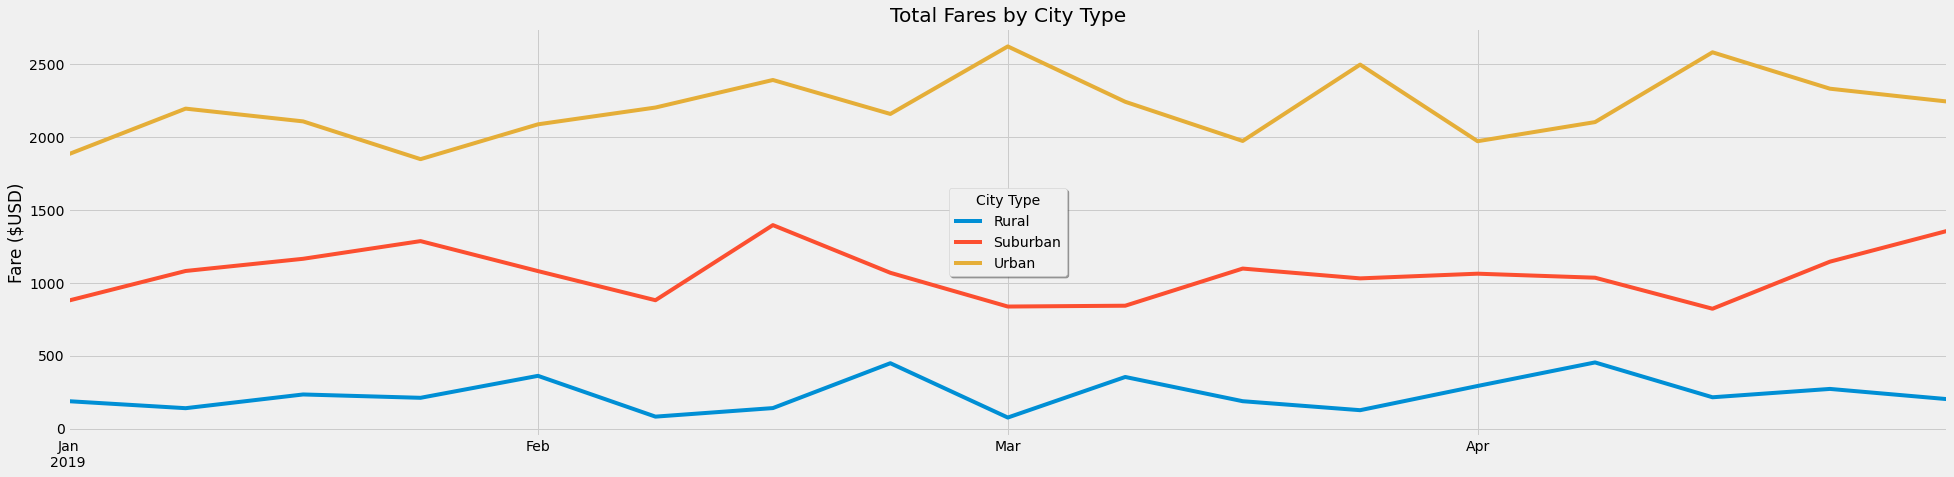

In [87]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Import figrure from Matplotlib. to set fugure size
from matplotlib.pyplot import figure



#create plot with figsize in call

weekly_fares_by_type.plot(figsize=(30,7))

plt.title("Total Fares by City Type")
plt.ylabel("Fare ($USD)")
plt.xlabel("")

plt.legend(title="City Type",shadow=True)
#plt.legend(loc='center')

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.show()



# Resize plot to display labels
#plt.tight_layout()
